In [2]:
import pandas as pd
import time
from datetime import datetime
from pandas import ExcelWriter 
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
#import seaborn as sns
#sns.set()

pd.__version__




'1.2.3'

In [3]:
# temp=1588744463872/1000
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(temp))

NameError: name 'temp' is not defined

In [ ]:
temp=1588744479826/1000
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(temp))

In [ ]:
    # Total number of seconds between dates

In [4]:
class JTLReader:
    def __init__(self,jtlPath):
        self.jtlPath=jtlPath
        self.jtlColumns = ['timeStamp', 'elapsed','label','threadName','dataType','bytes','sentBytes','URL','allThreads','success','responseCode','responseMessage']
        self.df_Jtl=pd.read_csv(self.jtlPath,usecols=self.jtlColumns,dtype={'label':'category'})#dtype={'label':'category'},nrows=195222    
        self.df_Jtl.sort_values(by=['timeStamp'],inplace=True) 
        self.df_Jtl.reset_index(drop=True, inplace=True)
        self.shape=self.df_Jtl.shape
        self.rows=self.shape[0]
        self.rows
        """Conver Epoc time to Actual Time Start"""
        self.df_Jtl['timeStamp'] = pd.to_datetime(self.df_Jtl['timeStamp'],unit='ms')
        self.df_Jtl['timeStamp'] = self.df_Jtl['timeStamp'].astype('datetime64[s]')#reduce precision pandas timestamp dataframe
        self.df_Jtl['timeStamp']=self.df_Jtl['timeStamp'].dt.tz_localize('utc').dt.tz_convert('Asia/Kolkata')
        self.df_Jtl['timeStamp'] = self.df_Jtl['timeStamp'].astype(str).str[:-6]
        self.df_Jtl['timeStamp'] = pd.to_datetime(self.df_Jtl['timeStamp'])
        self.df_Jtl['timeStamp'] = self.df_Jtl['timeStamp'].astype('datetime64[s]')
        """Conver Epoc time to Actual Time End"""
        
      

        """Saving master data frame to export to excel"""
        
        
        """Filter Transaction Controller & HTTP Request"""
        self.filt=(pd.isnull(self.df_Jtl['URL'])) #& (pd.isnull(self.df_Jtl['dataType']))
        self.df_jtl_TC=self.df_Jtl.loc[self.filt]
        self.df_jtl_HTTPReqeust=self.df_Jtl.loc[~self.filt]
        """Error Handling To be updated"""
        self.error_filt=(self.df_jtl_HTTPReqeust['success']==False) | (self.df_jtl_HTTPReqeust['success']==True)
        self.df_HttpErrors=self.df_jtl_HTTPReqeust.loc[self.error_filt]      
          
              
        
    """def getTransactionControllerData(self):
        print("Hello shiva")
        filt=(pd.isnull(self.df_Jtl['URL'])) & (pd.isnull(self.df_Jtl['dataType']))
        self.df_jtl_TC=self.df_Jtl.loc[filt]
        return self.df_jtl_TC"""
        

        
    def converTimeStamp(self):
        self.df_Jtl['timeStamp'] = pd.to_datetime(self.df_Jtl['timeStamp'],unit='ms')
        self.df_Jtl['timeStamp'] = self.df_Jtl['timeStamp'].astype('datetime64[s]')#reduce precision pandas timestamp dataframe
        self.df_Jtl['timeStamp']=self.df_Jtl['timeStamp'].dt.tz_localize('utc').dt.tz_convert('Asia/India')#Africa/Cairo
        self.df_Jtl['timeStamp'] = self.df_Jtl['timeStamp'].astype(str).str[:-6]
        self.df_Jtl['timeStamp'] = pd.to_datetime(self.df_Jtl['timeStamp'])
        self.df_Jtl['timeStamp'] = self.df_Jtl['timeStamp'].astype('datetime64[s]') 
        
    def ms_to_sec(self):
         self.df_Jtl['elapsed']=((self.df_Jtl['elapsed'])/1000)
        
        
    def overAllResponseTimeSummary(self):
        self.df_overAllResponseTimeSummary=self.df_jtl_TC[['timeStamp','elapsed']]
        return self.df_overAllResponseTimeSummary
       
    def listOfErrors(self):
        return self.df_Jtl['responseCode'].value_counts()
    
    def shapeOfDaraFrame(self):
        return self.df_Jtl.shape
    
    def columnType(self,columnName):
        self.columnName=columnName
        return self.df_Jtl[self.columnName].dtype
    
    def getPeriod(self):
        self.startTime=self.df_Jtl['timeStamp'][0]
        self.endRow=self.df_Jtl['timeStamp'].shape[0]
        self.endTime=self.df_Jtl['timeStamp'][self.endRow-1]
        return f'{self.startTime} : {self.endTime}'
    
    def getDuration(self):
        self.startTime= self.df_Jtl['timeStamp'][0]
        self.endRow= self.df_Jtl['timeStamp'].shape[0]
        self.endTime= self.df_Jtl['timeStamp'][self.endRow-1]#-1
        self.executionStartTime=datetime(self.startTime.year,self.startTime.month,self.startTime.day,self.startTime.hour,self.startTime.minute,self.startTime.second)
        self.executionEndTime=datetime(self.endTime.year,self.endTime.month,self.endTime.day,self.endTime.hour,self.endTime.minute,self.endTime.second)
        self.timeDiff = self.executionEndTime-self.executionStartTime
        self.duration_in_s = self.timeDiff.total_seconds()
        self.duration=time.strftime("%H:%M:%S", time.gmtime(self.duration_in_s))
        return self.duration
    
    def getMaxRunningVusers(self):
        self.allThread=self.df_Jtl['allThreads'].max()
        return self.allThread 
    
      
    def getTotalHits(self):
        return self.df_jtl_HTTPReqeust.shape[0]
    
    def getAvgHitsPerSecond(self):
        return self.df_jtl_HTTPReqeust.shape[0]/self.duration_in_s
    
    def getTotalThroughput(self):
        self.totalThroughput=self.df_jtl_TC['bytes'].sum()
        return self.totalThroughput
    
    def getAvgThroughputPerSecond(self):
        self.avgThroughput=(self.df_jtl_TC['bytes'].sum())/self.duration_in_s
        return self.avgThroughput
    
    def getTotalPassFailFreqList(self):
        self.passFail_freq=self.df_jtl_TC['success'].value_counts().to_frame()
        #self.passFailFrequencyeqList=self.passFail_freq.index.tolist()
        
        return self.passFail_freq      
    
    def getTotalErrors(self):
        self.totalError=self.df_HttpErrors[['responseCode']].groupby(['responseCode'])
        self.totalError=self.df_HttpErrors['responseCode'].count()
        return self.totalError

    def getAnalysisSummary(self):
        self.period=self.getPeriod()
        self.duration=self.getDuration()
        self.maxRunningVusers=self.getMaxRunningVusers()
        self.totalThroughput=self.getTotalThroughput()
        self.avgThroughputPerSecond=self.getAvgThroughputPerSecond()
        self.totalHits=self.getTotalHits()
        self.avgHitsPerSecond=self.getAvgHitsPerSecond()
        self.totalErrors=self.getTotalErrors()
        self.df_AnalysisSummary=pd.DataFrame(
            {
                'Data':[
                        'Period','Duration','Maximum Running Vusers','Total bytes',
                        'Average bytes/second','TotalHits','Average Hits Per Second',
                        'Total Error','Total Pass','Total Failed'
                ],
                'Values':[
                            self.period,self.duration,self.maxRunningVusers,self.totalThroughput,
                            self.avgThroughputPerSecond,self.totalHits,self.avgHitsPerSecond,
                            self.totalErrors,self.getTotalPassFailFreqList(),'NA'
                ]
                
            }
        )
        return self.df_AnalysisSummary
    
    def responseTimeSummary(self):
        self.df_responseTimeSummary=self.df_jtl_TC[['label','elapsed']]
        self.df_txnGroup=self.df_responseTimeSummary.groupby(['label'],observed=True )  #observed=True      
        self.df_txnGroup=self.df_txnGroup['elapsed'].describe(percentiles=[.90])#self.df_txnGroup.describe(percentiles=[.90])
        self.df_txnGroup.columns=self.df_txnGroup.columns.get_level_values(0)#self.df_txnGroup.columns=self.df_txnGroup.columns.get_level_values(1)
        self.df_txnGroup = self.df_txnGroup[['count','min','mean','90%','max',]]
        self.df_txnGroup.rename(columns={'count':'#Samples','min':'Min','mean':'Average','90%':'90 Percentile','max':'Max'},inplace=True)
        ##self.df_txnGroup=self.df_txnErrorGroup.reset_index() """To be enable if you run describe () on data frame. Now we are running on specific column"""
        ##self.df_txnGroup['throughput']=self.df_txnGroup['count']/self.duration_in_s
        ##self.validTxn_filt=(self.df_txnGroup['count']>0)
        self.df_responseTimeSummaryOutput=self.df_txnGroup #self.df_txnGroup[self.validTxn_filt]
       
        return self.df_responseTimeSummaryOutput
    
    def getPassFailSummary(self):
        self.df_passFailSummary=self.df_jtl_TC[['label','success']]
        self.df_passFailGroup=self.df_passFailSummary.groupby(['label'],observed=True)#whe we use observed=True-->refer https://stackoverflow.com/questions/54922327/valueerror-operands-could-not-be-broadcast-together-with-shape-when-calling-pan?answertab=votes#tab-top
        self.df_txnGroup=self.df_passFailGroup['success'].value_counts()
        self.df_txnGroupSlice=self.df_txnGroup.loc[:,]
        self.df_passFailSummaryOutput=self.df_txnGroupSlice.unstack()
        self.df_passFailSummaryOutput=self.df_passFailSummaryOutput.fillna(0)
        self.df_passFailSummaryOutput.rename(columns={True:'Pass',False:'Fail'},inplace=True)
        return self.df_passFailSummaryOutput
        
    def getFinalResponseSummary(self):
        rs=pd.merge(self.df_responseTimeSummaryOutput,self.df_passFailSummaryOutput,left_index=True,right_index=True)
        if 'Fail' in rs.columns:# If transaction fail observed 
            rs['Error%']=((rs['Fail'])/(rs['#Samples']))*100 
            rs=rs[['#Samples','Pass','Fail','Error%','Min','Average','90 Percentile','Max']]#'Fail','Error%'
            return rs
        else:# All transactions pass
            rs=rs[['#Samples','Pass','Min','Average','90 Percentile','Max']]
            
            return rs
            
            
    
    def getRunnerVuserGraphData(self):
        '''T=min,S=Seconds'''       
        self.df_vusers=self.df_jtl_TC[['timeStamp','allThreads']]
        self.df_vusers.sort_values(by=['timeStamp'])
        self.df_vusers.set_index('timeStamp',inplace=True)
        self.df_vusers_summary = pd.DataFrame()
        self.df_vusers_summary['Vusers']=self.df_vusers['allThreads'].resample('10S').max()  
        self.df_vusers_summary.ffill(inplace=True)
        return self.df_vusers_summary
         
        
    
    def getHitsPersecondGraphData(self):
        '''T=min,S=Seconds'''
        #self.df_jtl_HTTPReqeust['hits']=1
        self.df_hits=self.df_jtl_HTTPReqeust[['timeStamp','URL']]#self.df_jtl_HTTPReqeust[['timeStamp','hits']]
        #self.df_hits.sort_values(by=['timeStamp'])
        self.df_hits.set_index('timeStamp',inplace=True)
        self.df_hits_summary = pd.DataFrame()
        self.df_hits_summary['hitsCount']=self.df_hits['URL'].resample('1T').count()/60   
        #df.loc[(df!=0).any(axis=1)]
        self.df_hits_summary=self.df_hits_summary.loc[(self.df_hits_summary!=0).any(axis=1)]
        return self.df_hits_summary
        #return self.df_hits
    
    def getThrouhputPersecondGraphData(self):
        '''T=min,S=Seconds'''
        self.df_throughput=self.df_jtl_TC[['timeStamp','bytes']]
        #self.df_throughput.sort_values(by=['timeStamp'])
        self.df_throughput.set_index('timeStamp',inplace=True)
        self.df_throughput_summary = pd.DataFrame()
        self.df_throughput_summary['ThroughputReceived']=self.df_throughput['bytes'].resample('1T').sum()/60 
        return self.df_throughput_summary.astype(int)
        
    
    def getThrouhputSendPersecondGraphData(self):
        '''T=min,S=Seconds'''
        self.df_throughputsend=self.df_jtl_TC[['timeStamp','sentBytes']]
        #self.df_throughputsend.sort_values(by=['timeStamp'])
        self.df_throughputsend.set_index('timeStamp',inplace=True)
        self.df_throughputsend_summary = pd.DataFrame()
        self.df_throughputsend_summary['ThroughputSend']=self.df_throughputsend['sentBytes'].resample('1T').sum()/60    
        return self.df_throughputsend_summary.astype(int)
    
    def getErrorPersecondGraphData(self):
        '''T=min,S=Seconds'''
        self.df_errorCode=self.df_HttpErrors[['timeStamp','responseCode']]
        #self.df_throughputsend.sort_values(by=['timeStamp'])
        self.df_errorCode.set_index('timeStamp',inplace=True)
        self.df_errorCode_summary = pd.DataFrame()
        self.df_errorCode_summary['HTTPError']=self.df_errorCode['responseCode'].resample('1T').count() 
        return self.df_errorCode_summary
    
    def gerErrorPivot(self):
        self.df_df_HttpErrors_pivot=self.df_HttpErrors[['timeStamp','responseCode','responseMessage']]
        return self.df_df_HttpErrors_pivot.pivot_table(index=pd.Grouper(freq='T',key='timeStamp'),columns="responseMessage",aggfunc="count")        
 
    
    def getOverallResponseTime(self):
        return self.df_jtl_TC[['timeStamp','elapsed','label']]
    
    def getRawDataFrame(self):
        return self.df_Jtl
    
#     def get errorSummary(self):
#         self.filt_error=(self.df_jtl_HTTPReqeust['responseCode']!=200) & (self.df_jtl_HTTPReqeust['responseCode']!=202)
#         self.df_error=self.df_jtl_HTTPReqeust[self.filt_error]
#         return self.df_error
    
    def temp(self):
        self.slicer_grp=self.df_jtl_TC[['timeStamp','elapsed','label']]
        self.slicer_grp.sort_values(by=['timeStamp'])
        self.slicer_grp.set_index('timeStamp',inplace=True)
        self.df_response_summary_slicer = pd.DataFrame()
        self.df_slicer_txnGroup=self.slicer_grp.groupby(['label'],observed=True )
        self.df_response_summary_slicer=self.df_slicer_txnGroup['elapsed'].resample('30T').agg(['min','mean','max','count'])
        return self.df_response_summary_slicer
    
    def getDetailHttpErrors(self):
        self.df_errors=self.df_HttpErrors[['timeStamp','label','responseCode','responseMessage']]
        return  self.df_errors
    
    def getHttpErrorSummary(self):
        self.df_HttpErrorSummary=self.df_HttpErrors[['responseCode','responseMessage']].groupby(['responseCode'])
        self.df_HttpErrorSummary=self.df_HttpErrors['responseCode'].value_counts()
        return self.df_HttpErrorSummary
    
    
      
obj1=JTLReader("D:\\ICON2_to_CUB2_Performancetest_Delevirables\\ICON2_to_CUB2_TestResult\\07_Jul_30\\Result_SnapMessage_14400.jtl") 
#obj1.converTimeStamp()
obj1.ms_to_sec() 
obj1.getDuration()



'00:34:22'

In [ ]:
#obj1.gerErrorPivot()

In [152]:
#obj1.getHttpErrorSummary()

In [153]:
#y=obj1.getTotalPassFailFreqList()
#y

In [154]:
#x=obj1.temp()
#x

In [155]:
#obj1.df_Jtl

In [156]:
#obj1.df_jtl_HTTPReqeust

In [157]:
#obj1.df_jtl_TC

In [158]:
#obj1.getPeriod()

In [159]:
#obj1.getDuration()

In [160]:
#obj1.getMaxRunningVusers()

In [161]:
#obj1.getTotalThroughput()

In [5]:
"""Analysis Summery"""
analysisSummary=obj1.getAnalysisSummary()
analysisSummary


,Data,Values
0,Period,2021-07-30 07:18:02 : 2021-07-30 07:52:24
1,Duration,00:34:22
2,Maximum Running Vusers,1
3,Total bytes,2404080
4,Average bytes/second,1165.897187
5,TotalHits,14400
6,Average Hits Per Second,6.983511
7,Total Error,14400
8,Total Pass,success True 14400
9,Total Failed,NA


In [6]:
"""responseTimeSummary"""
pd.set_option('display.max_rows',200)
responseTimeSummary=obj1.responseTimeSummary()
responseTimeSummary.head(100)

,#Samples,Min,Average,90 Percentile,Max
label,,,,,
UAT_ICON2_09_SnapMessage,14400.0,68.0,143.038472,280.0,6519.0


In [7]:
"""Get Pass and Fail Summary"""
passandfail=obj1.getPassFailSummary()
passandfail

success,Pass
label,
UAT_ICON2_09_SnapMessage,14400


In [8]:
"""Get Final Response Summary"""
rs=obj1.getFinalResponseSummary()
rs

,#Samples,Pass,Min,Average,90 Percentile,Max
label,,,,,,
UAT_ICON2_09_SnapMessage,14400.0,14400,68.0,143.038472,280.0,6519.0


In [9]:
"""Get Vuser Summary"""
runningVuser=obj1.getRunnerVuserGraphData()
runningVuser

,Vusers
timeStamp,
2021-07-30 07:18:00,1
2021-07-30 07:18:10,1
2021-07-30 07:18:20,1
2021-07-30 07:18:30,1
2021-07-30 07:18:40,1
...,...
2021-07-30 07:51:40,1
2021-07-30 07:51:50,1
2021-07-30 07:52:00,1


In [10]:
"""Get Hits Summary"""
hitsPersecond=obj1.getHitsPersecondGraphData() 
hitsPersecond

,hitsCount
timeStamp,
2021-07-30 07:18:00,1.083333
2021-07-30 07:18:10,1.800000
2021-07-30 07:18:20,1.700000
2021-07-30 07:18:30,0.600000
2021-07-30 07:18:40,0.550000
...,...
2021-07-30 07:51:40,1.083333
2021-07-30 07:51:50,1.033333
2021-07-30 07:52:00,0.900000


In [11]:
"""Get Throughput Received Summery"""
throughput=obj1.getThrouhputPersecondGraphData()
throughput

,ThroughputReceived
timeStamp,
2021-07-30 07:18:00,180
2021-07-30 07:18:10,300
2021-07-30 07:18:20,283
2021-07-30 07:18:30,100
2021-07-30 07:18:40,91
...,...
2021-07-30 07:51:40,180
2021-07-30 07:51:50,172
2021-07-30 07:52:00,150


In [12]:
"""Get Throughput Send Summery"""
throughputsend=obj1.getThrouhputSendPersecondGraphData()
throughputsend

,ThroughputSend
timeStamp,
2021-07-30 07:18:00,28212
2021-07-30 07:18:10,46875
2021-07-30 07:18:20,44271
2021-07-30 07:18:30,15625
2021-07-30 07:18:40,14323
...,...
2021-07-30 07:51:40,28212
2021-07-30 07:51:50,26910
2021-07-30 07:52:00,23437


In [13]:
"""Get Error Summary"""
errors=obj1.getErrorPersecondGraphData()
errors

,HTTPError
timeStamp,
2021-07-30 07:18:00,401
2021-07-30 07:19:00,349
2021-07-30 07:20:00,288
2021-07-30 07:21:00,398
2021-07-30 07:22:00,469
2021-07-30 07:23:00,438
2021-07-30 07:24:00,449
2021-07-30 07:25:00,447
2021-07-30 07:26:00,544


In [14]:
"""overAllResponseTimeSummary"""
overallResponseTime=obj1.getOverallResponseTime()
overallResponseTime

,timeStamp,elapsed,label
0,2021-07-30 07:18:02,96,UAT_ICON2_09_SnapMessage
2,2021-07-30 07:18:02,75,UAT_ICON2_09_SnapMessage
4,2021-07-30 07:18:03,75,UAT_ICON2_09_SnapMessage
6,2021-07-30 07:18:03,77,UAT_ICON2_09_SnapMessage
8,2021-07-30 07:18:03,74,UAT_ICON2_09_SnapMessage
...,...,...,...
28790,2021-07-30 07:52:24,74,UAT_ICON2_09_SnapMessage
28792,2021-07-30 07:52:24,72,UAT_ICON2_09_SnapMessage
28794,2021-07-30 07:52:24,276,UAT_ICON2_09_SnapMessage
28796,2021-07-30 07:52:24,75,UAT_ICON2_09_SnapMessage


In [15]:
detailerrors=obj1.getDetailHttpErrors()
detailerrors

,timeStamp,label,responseCode,responseMessage
1,2021-07-30 07:18:02,UAT_ICON2-SnapMessage-0,200,NaN
3,2021-07-30 07:18:02,UAT_ICON2-SnapMessage-0,200,NaN
5,2021-07-30 07:18:03,UAT_ICON2-SnapMessage-0,200,NaN
7,2021-07-30 07:18:03,UAT_ICON2-SnapMessage-0,200,NaN
9,2021-07-30 07:18:03,UAT_ICON2-SnapMessage-0,200,NaN
...,...,...,...,...
28791,2021-07-30 07:52:24,UAT_ICON2-SnapMessage-0,200,NaN
28793,2021-07-30 07:52:24,UAT_ICON2-SnapMessage-0,200,NaN
28795,2021-07-30 07:52:24,UAT_ICON2-SnapMessage-0,200,NaN
28797,2021-07-30 07:52:24,UAT_ICON2-SnapMessage-0,200,NaN


In [16]:
errorPivot=obj1.gerErrorPivot()

In [17]:
obj1.getHttpErrorSummary()

200    14400
Name: responseCode, dtype: int64

In [18]:
rawdataframe=obj1.getRawDataFrame()
rawdataframe

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,bytes,sentBytes,allThreads,URL
0,2021-07-30 07:18:02,0.096,UAT_ICON2_09_SnapMessage,200,"Number of samples in transaction : 1, number o...",UAT_ICON2_SnapMessage 1-1,NaN,True,167,26042,1,NaN
1,2021-07-30 07:18:02,0.096,UAT_ICON2-SnapMessage-0,200,NaN,UAT_ICON2_SnapMessage 1-1,text,True,167,26042,1,http://172.24.129.8/htc2consumer/icon2snapmessage
2,2021-07-30 07:18:02,0.075,UAT_ICON2_09_SnapMessage,200,"Number of samples in transaction : 1, number o...",UAT_ICON2_SnapMessage 1-1,NaN,True,167,26042,1,NaN
3,2021-07-30 07:18:02,0.075,UAT_ICON2-SnapMessage-0,200,NaN,UAT_ICON2_SnapMessage 1-1,text,True,167,26042,1,http://172.24.129.8/htc2consumer/icon2snapmessage
4,2021-07-30 07:18:03,0.075,UAT_ICON2_09_SnapMessage,200,"Number of samples in transaction : 1, number o...",UAT_ICON2_SnapMessage 1-1,NaN,True,167,26042,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
28795,2021-07-30 07:52:24,0.276,UAT_ICON2-SnapMessage-0,200,NaN,UAT_ICON2_SnapMessage 1-1,text,True,167,26042,1,http://172.24.129.8/htc2consumer/icon2snapmessage
28796,2021-07-30 07:52:24,0.075,UAT_ICON2_09_SnapMessage,200,"Number of samples in transaction : 1, number o...",UAT_ICON2_SnapMessage 1-1,NaN,True,167,26042,1,NaN
28797,2021-07-30 07:52:24,0.075,UAT_ICON2-SnapMessage-0,200,NaN,UAT_ICON2_SnapMessage 1-1,text,True,167,26042,1,http://172.24.129.8/htc2consumer/icon2snapmessage
28798,2021-07-30 07:52:24,0.081,UAT_ICON2_09_SnapMessage,200,"Number of samples in transaction : 1, number o...",UAT_ICON2_SnapMessage 1-1,NaN,True,162,26042,1,NaN


In [19]:
"""Generate Excel Report"""
writer = ExcelWriter('PerformanceTestReport.xlsx',mode='w')
#Write Analysis Summary to Excel
analysisSummary.to_excel(writer,sheet_name='AnalysisSummary')
#write response summary to excel with txn name,min,avg,max,90% & max
rs.to_excel(writer,sheet_name='ResponseSummary')
#Write Running Vusers
runningVuser.to_excel(writer,sheet_name='RunningVuserSummary')
#Write Hits Summary
hitsPersecond.to_excel(writer,sheet_name='HitsSummary')
#Write Throughput Received Summary
throughput.to_excel(writer,sheet_name='ThroughputReceivedSummary')
#Write Throughput Send Summary
throughputsend.to_excel(writer,sheet_name='ThroughputSendSummary')
#Write error summary
errors.to_excel(writer,sheet_name='ErrorGraph')
#Write ResponseTime
#overallResponseTime.to_excel(writer,sheet_name='ResponseTimeGraph')
#Write Detail Errors
#detailerrors.to_excel(writer,sheet_name='DetailErrors')
#Write Error Pivot
errorPivot.to_excel(writer,sheet_name='ErrorPivot')
#Export Original dataframe
#rawdataframe.to_excel(writer,sheet_name='dataframe')
writer.save()







#Draw Running Vuser Graph

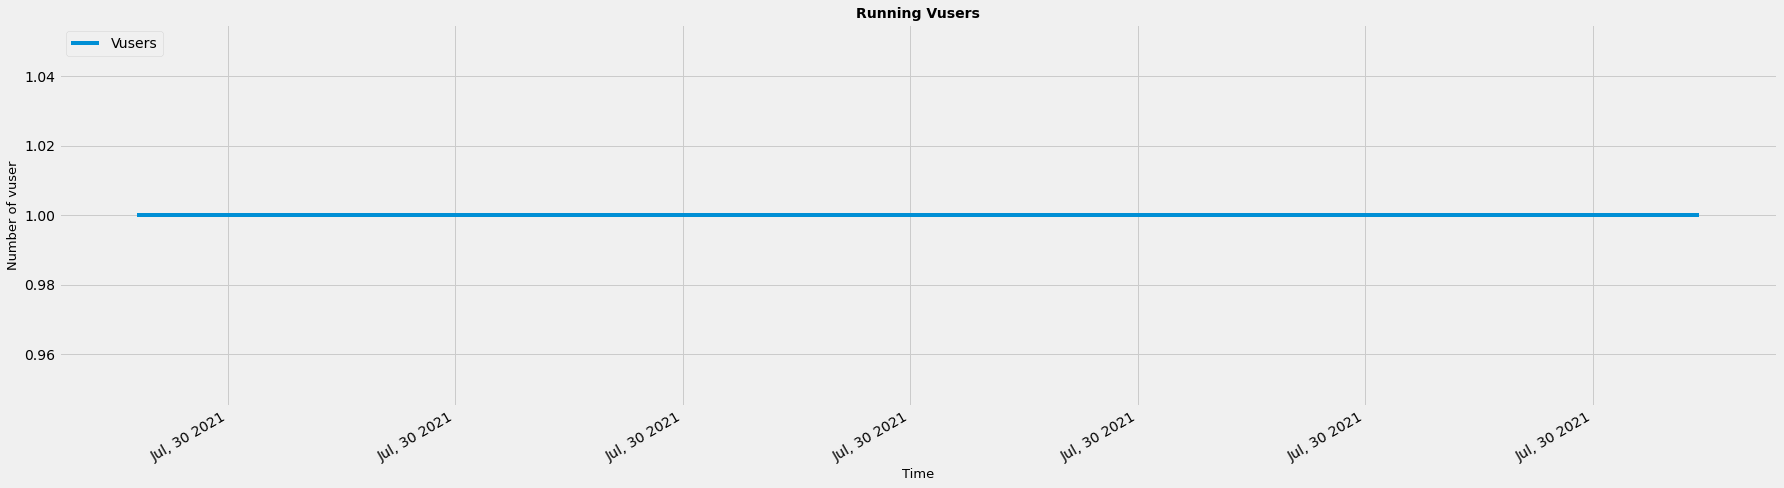

In [20]:
df_vuser=obj1.getRunnerVuserGraphData()
df_vuser.reset_index('timeStamp',inplace=True)
#Draw Graph
plt.style.use('fivethirtyeight')#print(plt.style.available)
plt.figure(figsize=(25,7))
plt.plot(df_vuser['timeStamp'],df_vuser['Vusers'],label='Vusers')#color="m",linestyle='-',linewidth=3,marker='.' #Important Line x & Y axis #crimson
plt.title("Running Vusers",fontsize=14,fontweight="bold")
plt.xlabel("Time",fontsize=13)#,fontweight="bold"
plt.ylabel("Number of vuser",fontsize=13)#,fontweight="bold"
plt.legend(loc='upper left')#This will take label name from plt.plot. So no need to pass the labe in sequence order
plt.gcf().autofmt_xdate()#plt.xticks(rotation=45,fontsize=13)
date_format=mpl_dates.DateFormatter('%b, %d %Y')#To formate the x axis with date format
plt.gca().xaxis.set_major_formatter(date_format)#To formate the x axis with date format
plt.tight_layout()#Automatically render without padding issue #plt.grid(True)
plt.show()
#plt.savefig("Vuser.png")


In [21]:
#Draw Hits Summary

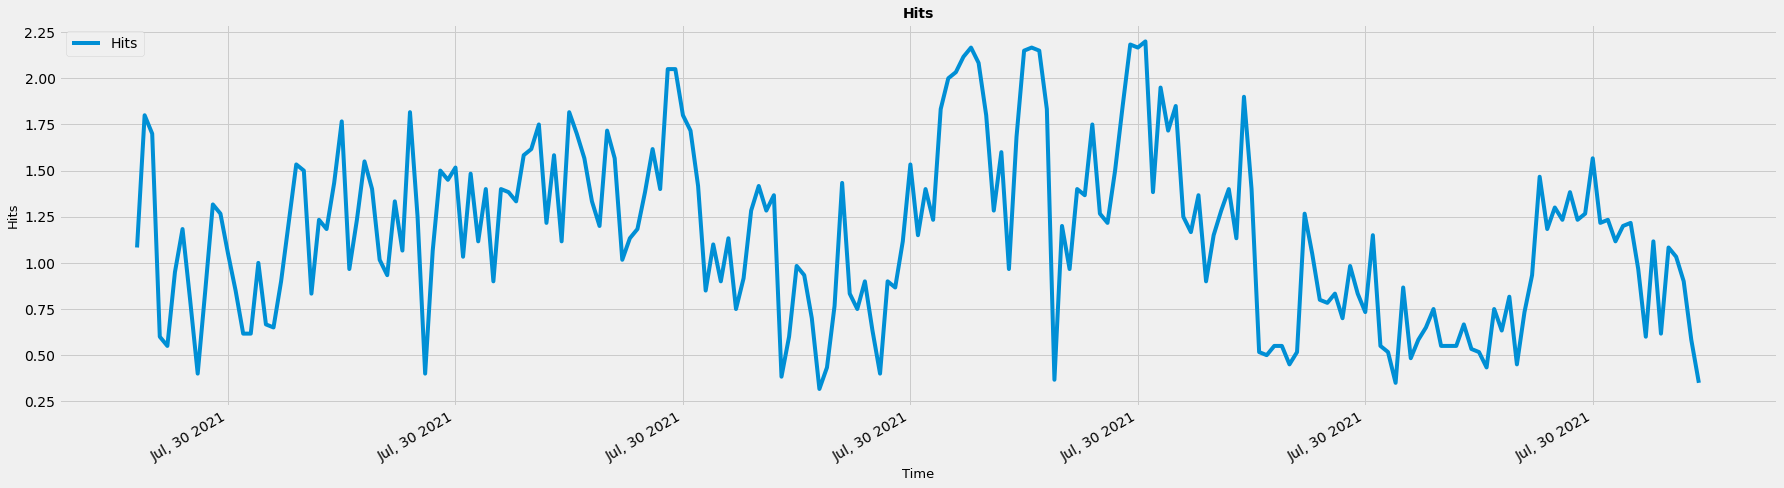

In [22]:
df_hits=obj1.getHitsPersecondGraphData()
df_hits.reset_index('timeStamp',inplace=True)
#Draw Graph
plt.style.use('fivethirtyeight')#print(plt.style.available)
plt.figure(figsize=(25,7))
plt.plot(df_hits['timeStamp'],df_hits['hitsCount'],label='Hits')#color="m",linestyle='-',linewidth=3,marker='.' #Important Line x & Y axis #crimson
plt.title("Hits",fontsize=14,fontweight="bold")
plt.xlabel("Time",fontsize=13)#,fontweight="bold"
plt.ylabel("Hits",fontsize=13)#,fontweight="bold"
plt.legend(loc='upper left')#This will take label name from plt.plot. So no need to pass the labe in sequence order
plt.gcf().autofmt_xdate()#plt.xticks(rotation=45,fontsize=13)
date_format=mpl_dates.DateFormatter('%b, %d %Y')#To formate the x axis with date format
plt.gca().xaxis.set_major_formatter(date_format)#To formate the x axis with date format
plt.tight_layout()#Automatically render without padding issue #plt.grid(True)
plt.show()
#plt.savefig("Vuser.png")

In [23]:
#Draw Throughput Received

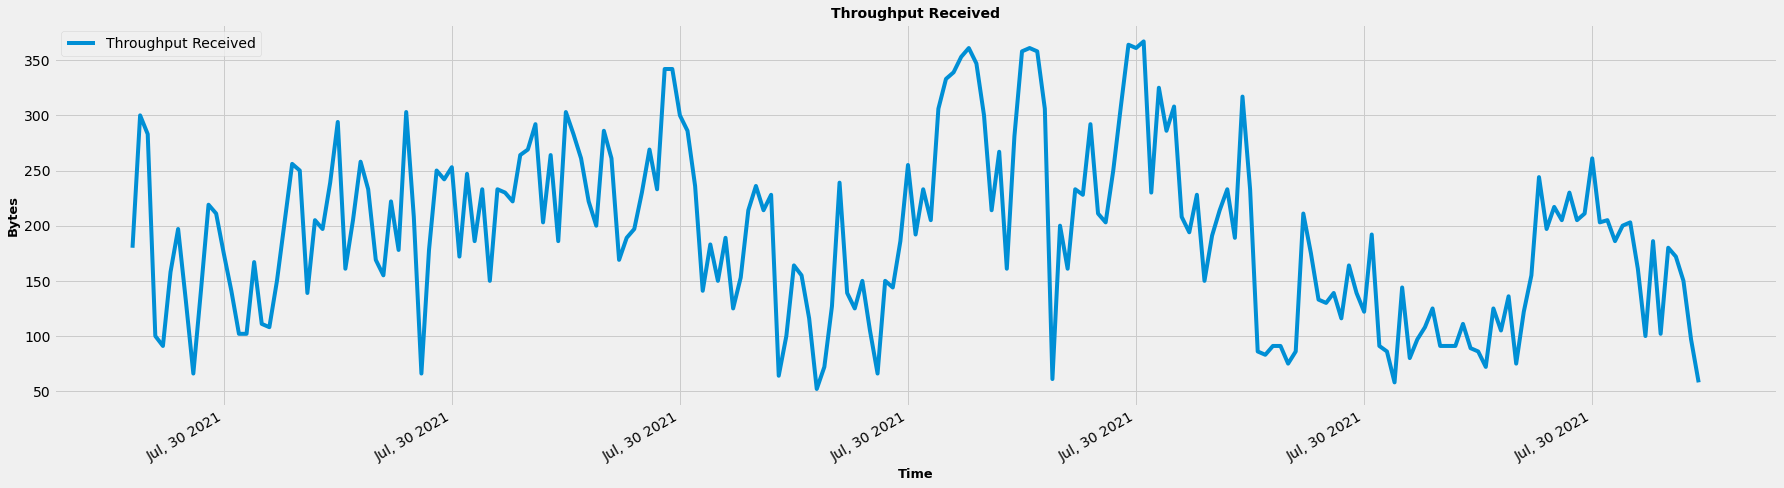

In [24]:
df_throughput=obj1.getThrouhputPersecondGraphData()
df_throughput.reset_index('timeStamp',inplace=True)


#Draw Graph
plt.style.use('fivethirtyeight')#print(plt.style.available)
plt.figure(figsize=(25,7))
plt.plot(df_throughput['timeStamp'],df_throughput['ThroughputReceived'],label='Throughput Received')#color="m",linestyle='-',linewidth=3,marker='.' #Important Line x & Y axis #crimson
plt.title("Throughput Received",fontsize=14,fontweight="bold")
plt.xlabel("Time",fontsize=13,fontweight="bold")#,fontweight="bold"
plt.ylabel("Bytes",fontsize=13,fontweight="bold")#,fontweight="bold"
plt.legend(loc='upper left')#This will take label name from plt.plot. So no need to pass the labe in sequence order
plt.gcf().autofmt_xdate()#plt.xticks(rotation=45,fontsize=13)
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain', axis='y')#To remove scientifice numbers
date_format=mpl_dates.DateFormatter('%b, %d %Y')#To formate the x axis with date format
plt.gca().xaxis.set_major_formatter(date_format)#To formate the x axis with date format
plt.tight_layout()#Automatically render without padding issue #plt.grid(True)
plt.show()


In [40]:
#Draw Throughput Send

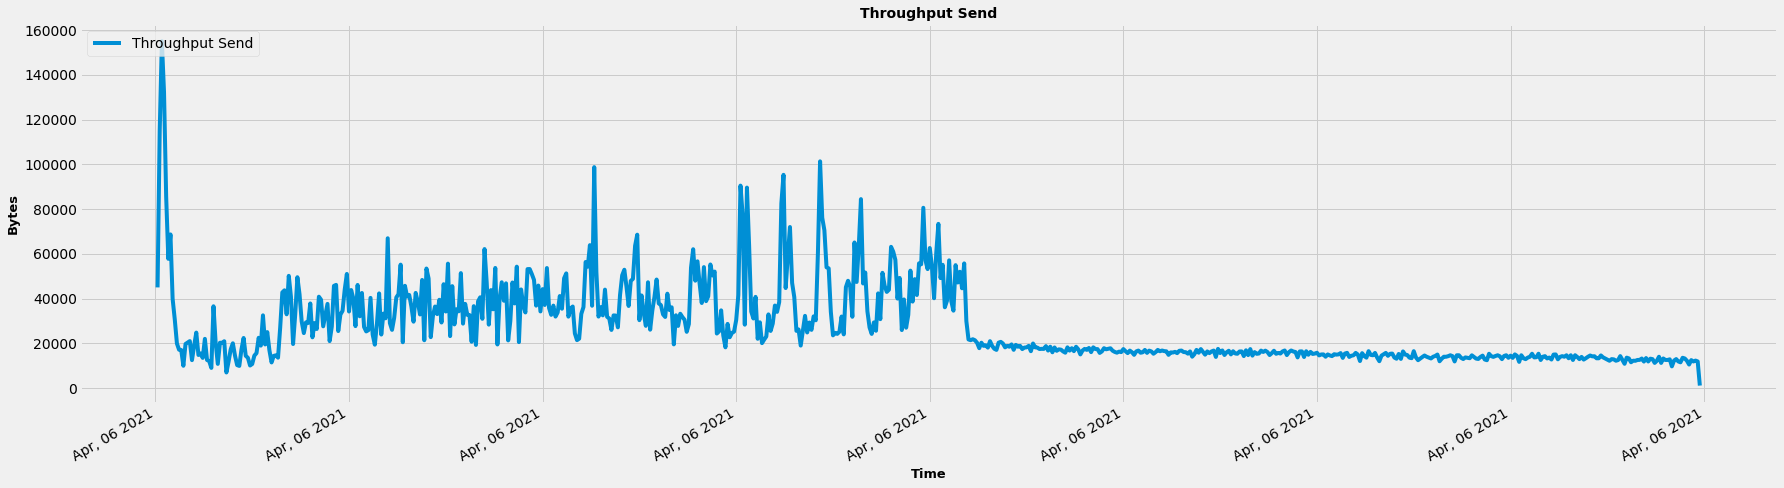

In [35]:
df_throughput_send=obj1.getThrouhputSendPersecondGraphData()
df_throughput_send.reset_index('timeStamp',inplace=True)

#Draw Graph
plt.style.use('fivethirtyeight')#print(plt.style.available)
plt.figure(figsize=(25,7))
plt.plot(df_throughput_send['timeStamp'],df_throughput_send['ThroughputSend'],label='Throughput Send')#color="m",linestyle='-',linewidth=3,marker='.' #Important Line x & Y axis #crimson
plt.title("Throughput Send",fontsize=14,fontweight="bold")
plt.xlabel("Time",fontsize=13,fontweight="bold")#,fontweight="bold"
plt.ylabel("Bytes",fontsize=13,fontweight="bold")#,fontweight="bold"
plt.legend(loc='upper left')#This will take label name from plt.plot. So no need to pass the labe in sequence order
plt.gcf().autofmt_xdate()#plt.xticks(rotation=45,fontsize=13)
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain', axis='y')#To remove scientifice numbers
date_format=mpl_dates.DateFormatter('%b, %d %Y')#To formate the x axis with date format
plt.gca().xaxis.set_major_formatter(date_format)#To formate the x axis with date format
plt.tight_layout()#Automatically render without padding issue #plt.grid(True)
plt.show()


In [42]:
#Draw Error Grph

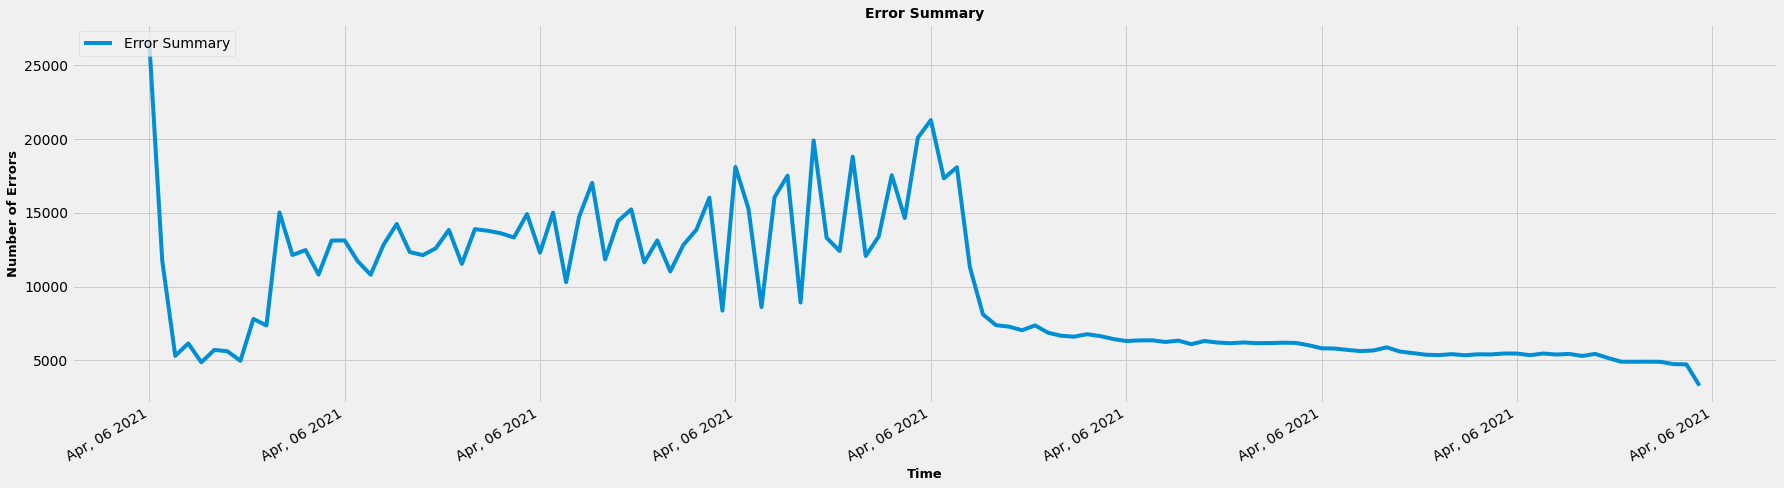

In [36]:
df_errors=obj1.getErrorPersecondGraphData()
df_errors.reset_index('timeStamp',inplace=True)

#Draw Graph
plt.style.use('fivethirtyeight')#print(plt.style.available)
plt.figure(figsize=(25,7))
plt.plot(df_errors['timeStamp'],df_errors['HTTPError'],label='Error Summary')#color="m",linestyle='-',linewidth=3,marker='.' #Important Line x & Y axis #crimson
plt.title("Error Summary",fontsize=14,fontweight="bold")
plt.xlabel("Time",fontsize=13,fontweight="bold")#,fontweight="bold"
plt.ylabel("Number of Errors",fontsize=13,fontweight="bold")#,fontweight="bold"
plt.legend(loc='upper left')#This will take label name from plt.plot. So no need to pass the labe in sequence order
plt.gcf().autofmt_xdate()#plt.xticks(rotation=45,fontsize=13)
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain', axis='y')#To remove scientifice numbers
date_format=mpl_dates.DateFormatter('%b, %d %Y')#To formate the x axis with date format
plt.gca().xaxis.set_major_formatter(date_format)#To formate the x axis with date format
plt.tight_layout()#Automatically render without padding issue #plt.grid(True)
plt.show()

In [ ]:
#Draw Vuser Plotly

In [23]:
import plotly.offline as pyo
import plotly.graph_objs as go
import random
#'rgb(131, 90, 241)','rgb(127, 166, 238)','rgb(111, 231, 219)','rgb(184, 247, 212)'
colors = ['rgb(128,128,0)']

df_vuser=obj1.getRunnerVuserGraphData()
df_vuser.reset_index('timeStamp',inplace=True)

x_values=df_vuser['timeStamp']
y_values=df_vuser['Vusers']


trace1=go.Scatter(x=x_values,y=y_values,mode='lines',showlegend=True,stackgroup='one',name='runningvusers',line=dict(width=2, color=random.choice(colors)),connectgaps=True)#stackgroup='one',fillcolor='rgba(231,107,243,0.2)'
data=[trace1]
layout=go.Layout(title='Running Vuser Graph',xaxis=dict(title='Time'),yaxis=dict(title='Vusers'),hovermode='closest')

fig=go.Figure(data=data,layout=layout)
fig.update_layout(
    template = 'plotly_dark',
    autosize=False,
    width=1200,
    height=400,
    plot_bgcolor='rgba(0,0,0,0)',    
    legend=dict(x=0.1,y=0.8,traceorder='normal'),
    title=dict(text='Running Vuser Graph',y=0.9,x=0.5,xanchor='center',yanchor='top'),
    title_font_family="Times New Roman",
    title_font_color='rgb(255,255,255)',

  annotations=[
        dict(xref='paper',x=0.90,y=40,xanchor='auto', yanchor='auto',font=dict(family='Arial',size=10),showarrow=False,
            text='Displays the number of Vusers that executed Vuser scripts,and their status,\nduring each second of a load test.\nThis graph is useful for determining the Vuser load on your server at any given moment')
    ]

)

#fig.update_xaxes(showgrid=True, gridwidth=0.1, gridcolor='rgb(105,105,105)')
#fig.update_yaxes(showgrid=True, gridwidth=0.1, gridcolor='rgb(105,105,105)')


pyo.plot(fig,filename='RunningVusers.html')

'RunningVusers.html'

In [ ]:
#Draw Hits Plotly

In [24]:
import plotly.offline as pyo
import plotly.graph_objs as go
import random
#'rgb(131, 90, 241)','rgb(127, 166, 238)','rgb(111, 231, 219)','rgb(184, 247, 212)'
colors = ['rgb(127, 166, 238)']

df_hits=obj1.getHitsPersecondGraphData()
df_hits.reset_index('timeStamp',inplace=True)

x_values=df_hits['timeStamp']
y_values=df_hits['hitsCount']


trace1=go.Scatter(x=x_values,y=y_values,mode='lines',showlegend=True,name='Hits',line=dict(width=2, color=random.choice(colors)),connectgaps=True)#stackgroup='one',fillcolor='rgba(231,107,243,0.2)'
data=[trace1]
layout=go.Layout(title='Hits Graph',xaxis=dict(title='Time'),yaxis=dict(title='Hits'),hovermode='closest')

fig=go.Figure(data=data,layout=layout)
fig.update_layout(
    template = 'plotly_dark',
    autosize=False,
    width=1200,
    height=400,
    plot_bgcolor='rgba(0,0,0,0)',    
    legend=dict(x=0.8,y=1,traceorder='normal'),
    title=dict(text='Hits Graph',y=0.9,x=0.5,xanchor='center',yanchor='top'),
    title_font_family="Times New Roman",
    title_font_color='rgb(255,255,255)',

  annotations=[
        dict(xref='paper',x=0.90,y=40,xanchor='auto', yanchor='auto',font=dict(family='Arial',size=10),showarrow=False,
            text='Displays the number of hits made on the Web server by Vusers during each second of the load test.This graph helps you evaluate the amount of load Vusers generate, in terms of the number of hits')
    ]

)

#fig.update_xaxes(showgrid=True, gridwidth=0.1, gridcolor='rgb(105,105,105)')
#fig.update_yaxes(showgrid=True, gridwidth=0.1, gridcolor='rgb(105,105,105)')


pyo.plot(fig,filename='HitsGraph.html')

'HitsGraph.html'

In [29]:
#Draw Throughput Receive Graph

In [26]:
import plotly.offline as pyo
import plotly.graph_objs as go
import random
#'rgb(131, 90, 241)','rgb(127, 166, 238)','rgb(111, 231, 219)','rgb(184, 247, 212)'
colors = ['rgb(111, 231, 219)']

df_throughput=obj1.getThrouhputPersecondGraphData()
df_throughput.reset_index('timeStamp',inplace=True)

x_values=df_throughput['timeStamp']
y_values=df_throughput['ThroughputReceived']


trace1=go.Scatter(x=x_values,y=y_values,mode='lines',showlegend=True,stackgroup='one',name='Throughput Received',line=dict(width=2, color=random.choice(colors)),connectgaps=True)#stackgroup='one',fillcolor='rgba(231,107,243,0.2)'
data=[trace1]
layout=go.Layout(title='Throughput Receive Graph',xaxis=dict(title='Time'),yaxis=dict(title='bytes'),hovermode='closest')

fig=go.Figure(data=data,layout=layout)
fig.update_layout(
    template = 'plotly_dark',
    autosize=False,
    width=1200,
    height=400,
    plot_bgcolor='rgba(0,0,0,0)',    
    legend=dict(x=0.8,y=1,traceorder='normal'),
    title=dict(text='Throughput Receive Graph',y=0.9,x=0.5,xanchor='center',yanchor='top'),
    title_font_family="Times New Roman",
    title_font_color='rgb(255,255,255)',

  annotations=[  #['auto', 'left', 'center', 'right']        #['auto', 'top', 'middle', 'bottom']
        dict(xref='paper',x=0.90,y=90,xanchor='right', yanchor='top',font=dict(family='Arial',size=10),showarrow=False,
            text='Displays the amount of throughput (in bytes) on the Web server during the load test.Throughput represents the amount of data that the Vusers received from the server ')
    ]

)

#fig.update_xaxes(showgrid=True, gridwidth=0.1, gridcolor='rgb(105,105,105)')
#fig.update_yaxes(showgrid=True, gridwidth=0.1, gridcolor='rgb(105,105,105)')


pyo.plot(fig,filename='ThroughputReceiveGraph.html')

'ThroughputReceiveGraph.html'

In [ ]:
#Draw Throughput Send Graph

In [25]:
import plotly.offline as pyo
import plotly.graph_objs as go
import random
#'rgb(131, 90, 241)','rgb(127, 166, 238)','rgb(111, 231, 219)','rgb(184, 247, 212)'
colors = ['rgb(131, 90, 241)']

df_throughput_send=obj1.getThrouhputSendPersecondGraphData()
df_throughput_send.reset_index('timeStamp',inplace=True)

x_values=df_throughput_send['timeStamp']
y_values=df_throughput_send['ThroughputSend']


trace1=go.Scatter(x=x_values,y=y_values,mode='lines',showlegend=True,stackgroup='one',name='Throughput Send',line=dict(width=2, color=random.choice(colors)),connectgaps=True)#stackgroup='one',fillcolor='rgba(231,107,243,0.2)'
data=[trace1]
layout=go.Layout(title='Throughput Send Graph',xaxis=dict(title='Time'),yaxis=dict(title='bytes'),hovermode='closest')

fig=go.Figure(data=data,layout=layout)
fig.update_layout(
    template = 'plotly_dark',
    autosize=False,
    width=1200,
    height=400,
    plot_bgcolor='rgba(0,0,0,0)',    
    legend=dict(x=0.8,y=1,traceorder='normal'),
    title=dict(text='Throughput Send Graph',y=0.9,x=0.5,xanchor='center',yanchor='top'),
    title_font_family="Times New Roman",
    title_font_color='rgb(255,255,255)',

  annotations=[  #['auto', 'left', 'center', 'right']        #['auto', 'top', 'middle', 'bottom']
        dict(xref='paper',x=1,y=90,xanchor='right', yanchor='top',font=dict(family='Arial',size=10),showarrow=False,
            text='Displays the amount of throughput (in bytes) on the Web server during the load test.Throughput represents the amount of data that the Vusers send to the server at any given second.This graph helps you to evaluate the amount of load ')
    ]

)

#fig.update_xaxes(showgrid=True, gridwidth=0.1, gridcolor='rgb(105,105,105)')
#fig.update_yaxes(showgrid=True, gridwidth=0.1, gridcolor='rgb(105,105,105)')


pyo.plot(fig,filename='ThroughputSendGraph.html')

'ThroughputSendGraph.html'

In [ ]:
#Draw Error Graph

In [27]:
import plotly.offline as pyo
import plotly.graph_objs as go
import random
#'rgb(131, 90, 241)','rgb(127, 166, 238)','rgb(111, 231, 219)','rgb(184, 247, 212)'
colors = ['rgb(127, 166, 238)']

df_errors=obj1.getErrorPersecondGraphData()
df_errors.reset_index('timeStamp',inplace=True)

x_values=df_errors['timeStamp']
y_values=df_errors['HTTPError']


trace1=go.Scatter(x=x_values,y=y_values,mode='lines',showlegend=True,stackgroup='one',name='Errors',line=dict(width=2, color=random.choice(colors)),connectgaps=True)#stackgroup='one',fillcolor='rgba(231,107,243,0.2)'
data=[trace1]
layout=go.Layout(title='Error Graph',xaxis=dict(title='Time'),yaxis=dict(title='Number of Errors'),hovermode='closest')

fig=go.Figure(data=data,layout=layout)
fig.update_layout(
    template = 'plotly_dark',
    autosize=False,
    width=1200,
    height=400,
    plot_bgcolor='rgba(0,0,0,0)',    
    legend=dict(x=0.8,y=1,traceorder='normal'),
    title=dict(text='Errors Graph',y=0.9,x=0.5,xanchor='center',yanchor='top'),
    title_font_family="Times New Roman",
    title_font_color='rgb(255,255,255)',

 
)

#fig.update_xaxes(showgrid=True, gridwidth=0.1, gridcolor='rgb(105,105,105)')
#fig.update_yaxes(showgrid=True, gridwidth=0.1, gridcolor='rgb(105,105,105)')


pyo.plot(fig,filename='Errors.html')

'Errors.html'